# **Spline interpolacion - Melanie Andrea Muñoz Chavarria**
  

In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
import sympy as sy
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(0,3)$.

In [2]:
x0, x1, x2 = -1, 0, 1
_x = np.array([x0, x1, x2])
y0, y1, y2 =  5, 3, 3
_y = np.array([y0, y1, y2])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(-1)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(-1)$, es decir, $2c_0+6d_0 = 2c_1$.

  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_1''(1) = 0$, o sea $2c_1+6d_1=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, y $c_1$. Le damos valores a las variables en python:

In [3]:
a0 = 5
a1 = 3
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$):

 * $b_0+d_0=3-a_0-c_0=-2$,
 * $b_1+c_1+d_1=3-a_1=0$,
 * $b_0+3d_0 - b_1 = -2c_0 = 0$,
 * $6d_0 - 2c_1 = -2c_0=0$
 * $2c_1+6d_1=0$


La matriz y el segundo miembro asociados son:

In [4]:
A = np.array([
	[ 1, 1,   0,  0, 0],
	[ 0, 0,   1,  1, 1],
	[ 1, 3,  -1,  0, 0],
	[ 0, 6,   0, -2, 0],
	[ 0, 0,   0,  2, 6]])
b = np.array([-2, 0, 0, 0, 0])

In [5]:
sol = solve(A,b)
print(sol)

[-2.5  0.5 -1.   1.5 -0.5]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [6]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))

a0, b0, c0, d0 = 5.000000, -2.500000, 0.000000, 0.500000
a1, b1, c1, d1 = 3.000000, -1.000000, 1.500000, -0.500000


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ y representarlos gráficamente.

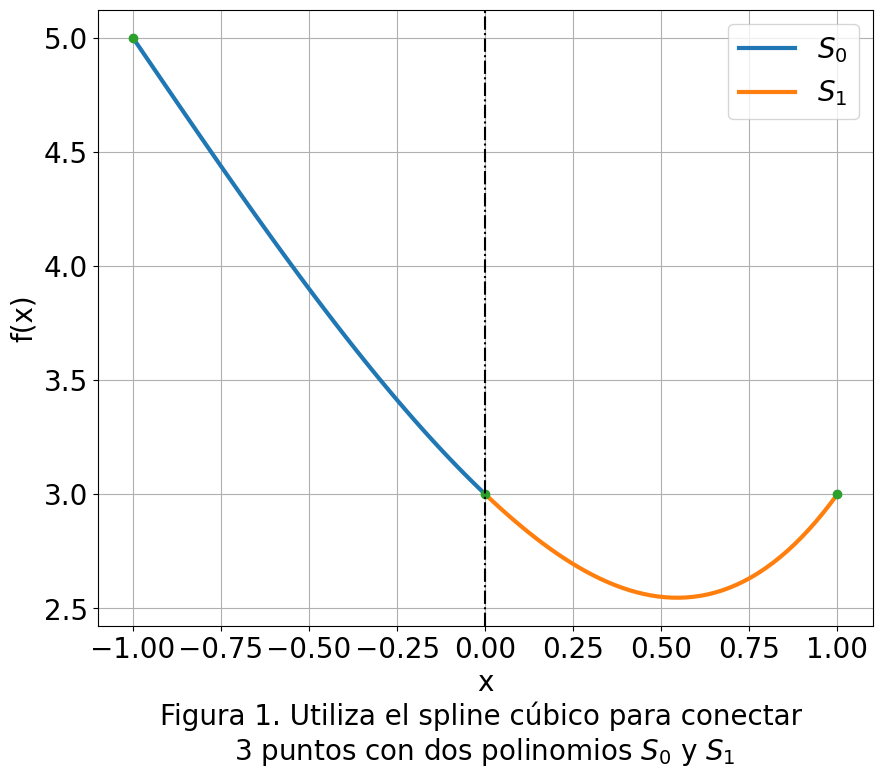

In [29]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "$S_0$")
plt.plot(xx1, s1(xx1), lw=3, label = "$S_1$")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel('''x
Figura 1. Utiliza el spline cúbico para conectar
3 puntos con dos polinomios $S_0$ y $S_1$''',
fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()

##**Agregando otro punto**

In [8]:
x0, x1, x2,x3 = -1, 0, 1,2
_x1 = np.array([x0, x1, x2,x3])
y0, y1, y2,y3 =  5, 3, 3, 7
_y1 = np.array([y0, y1, y2,y3])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$ y $[1,2]$. Empleando las condiciones del metodo de spline, y defiendo los

In [9]:
#Constantes
a_0=sy.Symbol('a_0')
a_1=sy.Symbol('a_1')
a_2=sy.Symbol('a_2')

b_0=sy.Symbol('b_0')
b_1=sy.Symbol('b_1')
b_2=sy.Symbol('b_2')

c_0=sy.Symbol('c_0')
c_1=sy.Symbol('c_1')
c_2=sy.Symbol('c_2')

d_0=sy.Symbol('d_0')
d_1=sy.Symbol('d_1')
d_2=sy.Symbol('d_2')

#X variable
x=sy.Symbol('x')


In [10]:
#Funciones
S_0_=a_0+b_0*(x+1)+c_0*(x+1)**2+d_0*(x+1)**3
S_1_=a_1+b_1*(x)+c_1*(x)**2+d_1*(x)**3
S_2_=a_2+b_2*(x-1)+c_2*(x-1)**2+d_2*(x-1)**3

In [11]:
#Derivadas de primer orden
S_0_primera_=sy.diff(S_0_,x)
S_1_primera_=sy.diff(S_1_,x)
S_2_primera_=sy.diff(S_2_,x)

In [12]:
#Derivadas de orden dos
S_0_segunda_=sy.diff(S_0_primera_,x)
S_1_segunda_=sy.diff(S_1_primera_,x)
S_2_segunda_=sy.diff(S_2_primera_,x)

In [13]:
print(S_2_segunda_)

2*c_2 + 3*d_2*(2*x - 2)


In [14]:
#Funciones para evaluaciones en los extremos del intervalo
S_0=lambda x: a_0+b_0*(x+1)+c_0*(x+1)**2+d_0*(x+1)**3
S_1=lambda x: a_1+b_1*(x)+c_1*(x)**2+d_1*(x)**3
S_2=lambda x: a_2 + b_2*(x - 1) + c_2*(x - 1)**2 + d_2*(x - 1)**3

In [15]:
#Derivadas para evaluaciones en los extremos del intervalo
S_0_primera=lambda x: b_0 + c_0*(2*x + 2) + 3*d_0*(x + 1)**2
S_1_primera=lambda x: b_1 + 2*c_1*x + 3*d_1*x**2
S_2_primera=lambda x: b_2 + c_2*(2*x - 2) + 3*d_2*(x - 1)**2


In [16]:
#Segunda derivadas evaluaciones en los extremos
S_0_segunda=lambda x: 2*c_0 + 3*d_0*(2*x + 2)
S_1_segunda=lambda x: 2*c_1 + 6*d_1*x
S_2_segunda=lambda x: 2*c_2 + 3*d_2*(2*x - 2)

In [17]:
print(S_0_segunda_)
print(S_1_segunda_)
print(S_2_segunda_)

2*c_0 + 3*d_0*(2*x + 2)
2*c_1 + 6*d_1*x
2*c_2 + 3*d_2*(2*x - 2)


Las funciones obtenidas son:


*  $s_0(x)=a_0 + b_0 ({x+1}) +c_0({x+1})^{2}+d_0({x+1})^{3}$
*  $s_1(x)= a_1 + b_1({x})+c_1({x})^{2}+d_1({x})^{3}$
*  $s_2(x)= a_2 + b_2({x-1}) + c_2({x-1})^{2} + d_2 ({x-1})^{3}$

Sus primera derivadas:
*  $s'_0(x)=b_0 + c_0({2x + 2}) + 3d_0({x + 1})^{2}$
*  $s'_1(x)=b_1 + 2c_1(x) + 3d_1({x})^{2}$
*  $s'_2(x)= b_2 + c_2({2x - 2}) + 3d_2({x - 1})^{2}$

Sus segundas derivadas:
*  $s''_0(x)=2c_0 + 3d_0({2x + 2})$
*  $s''_1(x)= 2c_1 + 6d_1(x)$
*  $s''_2(x)= 2c_2 + 3d_2({2x - 2})$






In [18]:
#Evaluaciones de la funciones para la interpolación
print(S_0(-1),'=',y0)
print(S_0(0),'=',y1)
print(S_1(0),'=',y1)
print(S_1(1),'=',y2)
print(S_2(1),'=',y2)
print(S_2(2),'=',y3)

print('______')
#Derivabilidad
print(S_0_primera(0),'=',S_1_primera(0))
print(S_1_primera(1),'=',S_2_primera(1))
print(S_0_segunda(0),'=',S_1_segunda(0))
print(S_1_segunda(1),'=',S_2_segunda(1))



print('______')

#Condiociones en los estremos
print(S_0_segunda(-1),'=',0)
print(S_2_segunda(2),'=',0)




a_0 = 5
a_0 + b_0 + c_0 + d_0 = 3
a_1 = 3
a_1 + b_1 + c_1 + d_1 = 3
a_2 = 3
a_2 + b_2 + c_2 + d_2 = 7
______
b_0 + 2*c_0 + 3*d_0 = b_1
b_1 + 2*c_1 + 3*d_1 = b_2
2*c_0 + 6*d_0 = 2*c_1
2*c_1 + 6*d_1 = 2*c_2
______
2*c_0 = 0
2*c_2 + 6*d_2 = 0


Las ecuaciones resultantes son:

Para los intervalos:
* $s_0(-1)=5$, entonces $a_0 = 5$
* $s_0(0)=3$, entonces $a_0 + b_0 + c_0 + d_0 = 3$
* $s_1(0)=3$, entonces $a_1=3$
* $s_1(1)=3$, entonces $a_1 + b_1 + c_1 + d_1 = 3$
* $s_2(1)=3$, entonces $a_2=3$
* $s_2(2)=7$, entonces $a_2 + b_2 + c_2 + d_2 = 7$

Para la derivabilidad, que garantiza continuidad:
* $s'_0(0)=s'_1(0)$, entonces $b_0 + 2c_0 + 3d_0 = b_1$
* $s'_1(1)=s'_2(1)$, entonces $b_1 + 2c_1 + 3d_1 = b_2$
* $s''_0(0)=s''_1(0)$, entonces $2c_0 + 6d_0 = 2c_1$
* $s''_1(1)=s''_2(1)$, entonces $2c_1 + 6d_1 = 2c_2$

Y las condiciones en los extremos:
*  $s''_0(-1)=0$, entonces $2c_0 = 0$
* $s''_2(2)=0$, entonces $2c_2 + 6d_2 = 0$







In [19]:
a0=5
a1=3
a2=3
c0=0

Como $a_0=5, a_1=3, a_2=3, c_0=0$ Se tiene que:
* $b_0+d_0=-2$
* $b_1+c_1+d_1=0$
* $b_2+c_2+d_2=4$
* $b_0 + 3d_0 - b1=0$
* $b_1 + 2c_1 + 3d_1-b_2=0$
* $6d_0-2c_1=0$
* $2c_1+6d_1 -2c_2=0$
* $2c_2+6d_2=0$

Generando un sistema ampliada, se tiene que:


In [20]:
#Matriz
A=np.array([
    [1,1,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0],
    [0,0,0,0,0,1,1,1],
    [1,3,-1,0,0,0,0,0],
    [0,0,1,2,3,-1,0,0],
    [0,6,0,-2,0,0,0,0],
    [0,0,0,2,6,0,-2,0],
    [0,0,0,0,0,0,2,6]])

print(A.shape)

(8, 8)


In [21]:
#Vector
b=np.array([-2,0,4,0,0,0,0,0])
print(b.shape)

(8,)


In [22]:
#Solución del sistema ampliado
solucion=solve(A,b)
b0,d0,b1,c1,d1,b2,c2,d2=solucion
solucion

array([-2.26666667,  0.26666667, -1.46666667,  0.8       ,  0.66666667,
        2.13333333,  2.8       , -0.93333333])

In [23]:
print(f'Los valores para a_0,b_0,c_0,d_0 son:{a0,b0,c0,d0}')
print(f'Los valores para a_1,b_1,c_1,d_1 son:{a1,b1,c1,d1}')
print(f'Los valores para a_2,b_2,c_2,d_2 son:{a2,b2,c2,d2}')

Los valores para a_0,b_0,c_0,d_0 son:(5, -2.2666666666666666, 0, 0.2666666666666666)
Los valores para a_1,b_1,c_1,d_1 son:(3, -1.4666666666666668, 0.7999999999999998, 0.6666666666666667)
Los valores para a_2,b_2,c_2,d_2 son:(3, 2.1333333333333333, 2.8000000000000003, -0.9333333333333335)


In [24]:
#Ecuaciones para analizar el resultado

def s_0(x):
 p=a0+b0*(x+1)+c0*(x+1)**2+d0*(x+1)**3
 return p

def s_1(x):
  p1=a1+b1*(x)+c1*(x)**2+d1*(x)**3
  return p1

def s_2(x):
  p2=a2 + b2*(x - 1) + c2*(x - 1)**2 + d2*(x - 1)**3
  return p2


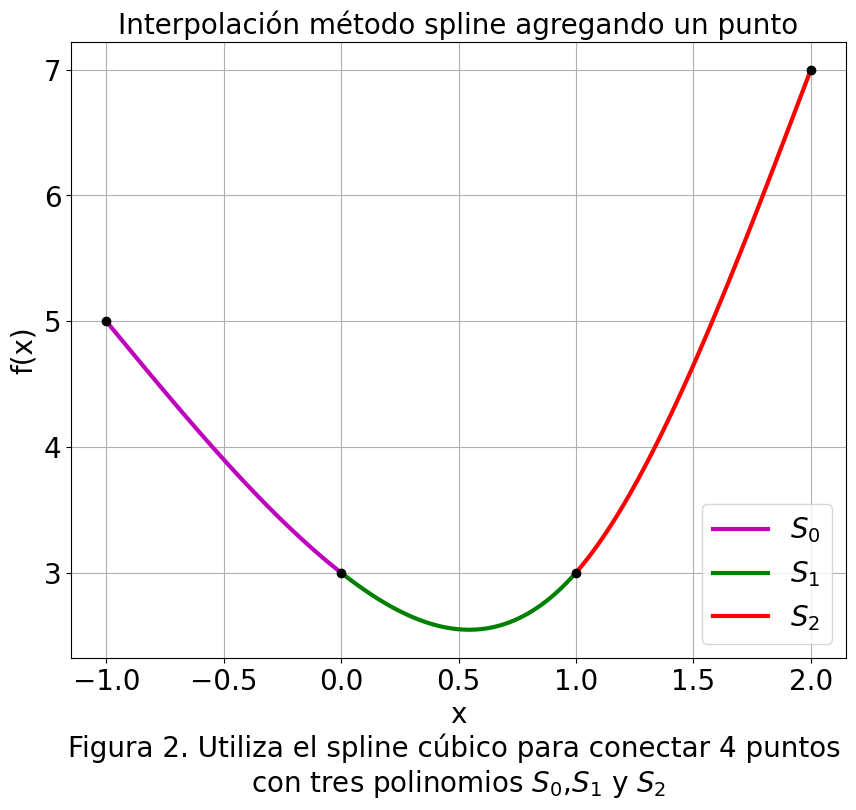

In [28]:
#Grafico del resultado
xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)
xx2 = np.linspace(1,2)


plt.figure(figsize=(10, 8))
plt.title('Interpolación método spline agregando un punto',fontsize=20)
plt.plot(xx0, s_0(xx0),'m',lw=3, label = "$S_0$")
plt.plot(xx1, s_1(xx1),'g', lw=3, label = "$S_1$")
plt.plot(xx2, s_2(xx2),'r', lw=3, label = "$S_2$")
plt.plot(_x1, _y1, '.k',markersize=12)
plt.ylabel("f(x)", fontsize=20)
plt.xlabel('''x
Figura 2. Utiliza el spline cúbico para conectar 4 puntos
con tres polinomios $S_0$,$S_1$ y $S_2$''',
fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "lower right", fontsize= 20)
plt.grid()
plt.show()